/tmp/ipykernel_1727/4008080941.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[1] = pd.to_datetime(df[1])


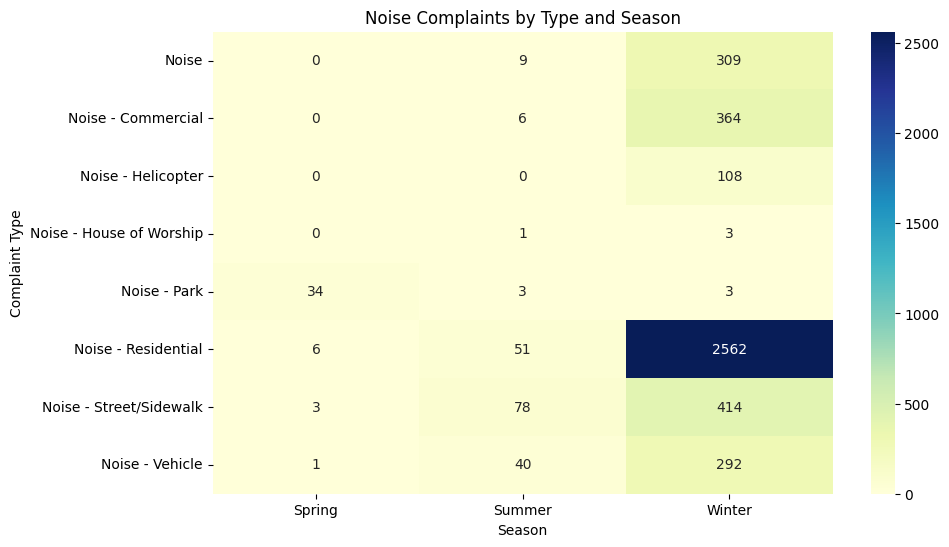

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset with no header
df = pd.read_csv("nyc_311.csv", header=None)

# Extract relevant columns by index (complaint type and timestamp)
df = df[[1, 3]]
noise = df[df[3].str.contains("Noise")]

df = noise
# Convert the timestamp to a datetime object
df[1] = pd.to_datetime(df[1])

# Define a function to categorize seasons based on the month
def get_season(month):
    if 3 <= month.month <= 5:
        return "Spring"
    elif 6 <= month.month <= 8:
        return "Summer"
    elif 9 <= month.month <= 11:
        return "Fall"
    else:
        return "Winter"


# Apply the get_season function to categorize seasons directly
df[1] = df[1].apply(get_season)


# Create a heatmap to visualize the differences
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(index=df[3], columns=df[1]), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Noise Complaints by Type and Season")
plt.xlabel("Season")
plt.ylabel("Complaint Type")
plt.show()
